### **Índice do documento** 
    
4. [Model Devepolment](#4.-Model-Devepolment)

    4.1 [Split the data into training, validation, and test sets](#4.1-)
    
    4.2 [Time Windowing](#4.2-)
    
    

Time Windowing: 
+ Segment the time series data into fixed-size windows (e.g., 1 second, 5 seconds).
+ Experiment with different window sizes to see their impact on model performance.

1. Model Architecture Design

+ Design RNN-based models using different types of layers:
    * Traditional RNN layers
    * Long Short-Term Memory (LSTM) layers
+ Define multiple architectures, e.g., a simple RNN, a single-layer LSTM, and a multi-layer LSTM.

2. Model Implementation

+ Implement the models using a deep learning framework such as TensorFlow or PyTorch.
+ Compile the models with appropriate loss functions and optimizers (e.g., categorical cross-entropy, Adam).

3. Model Training

+ Train the models on the training set with different configurations of RNN layers and time windows.
+ Use validation data to tune hyperparameters and avoid overfitting.
+ Save the model weights and training logs for analysis.

In [1]:
import os 
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Definir o caminho do arquivo relativo ao diretório do script
file_path = os.path.join(os.getcwd(), 'RNN_dataset', 'concatDataset.csv')

In [3]:
df_motionSense = pd.read_csv(file_path)

In [4]:
df_motionSense.head(5)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_id,session_id,category
0,0.351138,-0.416302,-0.098023,0.314588,0.404381,-0.858784,-0.003655,0.009577,-0.000234,0.000094,0.000252,-0.006954,1,13,sit
1,0.351219,-0.416372,-0.098025,0.314649,0.404445,-0.858732,-0.007937,0.007457,0.000807,-0.001309,0.002262,-0.010348,1,13,sit
2,0.351145,-0.416497,-0.098045,0.314567,0.404560,-0.858708,-0.007960,-0.001053,-0.002387,-0.002174,0.000012,-0.006664,1,13,sit
3,0.350849,-0.416695,-0.098148,0.314286,0.404740,-0.858726,-0.000521,-0.006411,-0.001261,0.001693,0.009216,-0.011575,1,13,sit
4,0.350859,-0.416863,-0.098022,0.314271,0.404894,-0.858658,-0.001613,-0.004306,0.006206,0.005767,0.007490,-0.008926,1,13,sit


**Splitting Data for Machine Learning**

The following code uses the 'train_test_split' function from scikit-learn to divide the dataset into training and testing sets. It separates the input features ('x_columns') and the target variable ('y_columns') with a 20% test set size, ensuring that the lengths of the training sets for both features and labels are the same, as asserted.

### **USA-SE O DUMMIES? ou o labelEncoder??**
+ Conversão da coluna *'sentiment'* em valores binários usando o `LabelEncoder` da biblioteca sklearn

In [104]:
##df = pd.get_dummies(df, columns=['category']).astype(int)
#df

In [5]:
activities = df_motionSense['category']
labels = df_motionSense.drop(columns=['category'])

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(activities)

print(encoder.classes_)
print(activities.value_counts())

['sit' 'ups' 'wlk']
category
wlk    344288
sit    338778
ups    157285
Name: count, dtype: int64


In [8]:
# minimax saclare é aos dados de treino
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming X is your feature matrix
#scaler = MinMaxScaler()
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(labels)

**Sequencing Data for Temporal Analysis**

We define a sequence generator function that creates sequences of input features and corresponding target labels from the training and testing data. These sequences have a window length of 150 with a stride of 10. The mode of target labels within each sequence is calculated to represent the label for that sequence. This prepares the data for temporal analysis tasks.

In [9]:
# Generate time series data
def create_sequences(data, target, window_size):
    sequences = []
    targets = []
    
    for i in range(len(data) - window_size):
        #Caso queiramos ver melhor e passar para o dataset substituimos pelo iloc...
        seq = data[i:i+window_size]#.iloc[i:i+window_size].values 
        label = target[i+window_size]#.iloc[i+window_size]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

In [21]:
# Definir parâmetros
WINDOW_LENGTH = 50
STRIDE_LENGTH = 10
NUM_CLASSES = len(encoder.classes_)
NUM_FEATURES = labels.shape[1]
BATCH_SIZE = 32
EPOCHS_SIZE = 10

In [11]:
X_seq, y_seq = create_sequences(X_scaled, encoded_labels, WINDOW_LENGTH)

In [110]:
#from scipy.stats import mode

# Definir parâmetros
#WINDOW_LENGTH = 150
#STRIDE_LENGTH = 10
#NUM_CLASSES = 3
#NUM_FEATURES = 14
#BATCH_SIZE = 32
#EPOCHS_SIZE = 10

# Função para gerar sequências
#def sequence_generator(x, y, length, stride):
 #   seq_x = []
  #  seq_y = []
   # data_length = len(x)

    #for i in range(0, data_length - length + 1, stride):
     #   input_sequence = x.iloc[i : i + length]  # Sequência de features
      #  target_sequence = y[i : i + length]     # Sequência de rótulos
       # target_mode = mode(target_sequence)[0]  # Calcular o modo da sequência de rótulos
        #seq_x.append(input_sequence)
        #seq_y.append(target_mode)
    #return np.array(seq_x), np.array(seq_y)

# Gerar as sequências para treino e teste
#tx, ty = sequence_generator(X_train, y_train, WINDOW_LENGTH, STRIDE_LENGTH)
#vx, vy = sequence_generator(X_test, y_test, WINDOW_LENGTH, STRIDE_LENGTH)


+ Divisão do *Dataset* em conjuntos de treino e teste utilizando o `train_test_split` da biblioteca sklearn

In [12]:
# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)#, stratify=encoded_labels)
#parâmetros: stratify = encoded_labels

assert(len(X_train) == len(y_train))

+ Verificação do tamanho das novas variáveis

In [88]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))

print("\n")

print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))

print("\n")

print("Train proportion: {:.0%}".format(len(X_train) / (len(X_train) + len(X_test))))
print("Test proportion: {:.0%}".format(len(X_test) / (len(X_train) + len(X_test))))

Size of X_train: 672264
Size of y_train: 672264


Size of X_test: 168067
Size of y_test: 168067


Train proportion: 80%
Test proportion: 20%


**One-Hot Encoding Target Labels**

In this code, the 'to_categorical' function from Keras is used to perform one-hot encoding on the target labels. This transforms the single integer labels into binary arrays, making them suitable for multi-class classification tasks with a total of 6 classes (NUM_CLASSES = 6).

In [13]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

**Defining LSTM-based Deep Learning Model**

This code snippet utilizes the Keras library to build a deep learning model for sequence classification. The model includes an LSTM layer with 6 units, followed by a flattening layer, a dense layer with 128 neurons and ReLU activation, and a final output layer with softmax activation for multi-class classification. The model is compiled using categorical cross-entropy loss and the Adam optimizer. A summary of the model architecture is displayed.

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


model = Sequential()
model.add(SimpleRNN(100, input_shape=(WINDOW_LENGTH, X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        11,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,803 (46.11 KB)

 Trainable params: 11,803 (46.11 KB)

 Non-trainable params: 0 (0.00 B)

**Training the LSTM Model**

This code trains the previously defined LSTM-based deep learning model. It uses the training sequences 'tx' and their corresponding one-hot encoded labels 'tty' with a specified number of epochs ('EPOCHS_SIZE') and batch size ('BATCH_SIZE'). The training progress and performance metrics are stored in the 'history' variable for analysis.

In [16]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 154s 7ms/step - accuracy: 0.9086 - loss: 0.2724 - val_accuracy: 0.9996 - val_loss: 0.0021
Epoch 2/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 137s 7ms/step - accuracy: 0.9763 - loss: 0.0807 - val_accuracy: 0.9648 - val_loss: 0.1486
Epoch 3/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 140s 7ms/step - accuracy: 0.9494 - loss: 0.1731 - val_accuracy: 0.9064 - val_loss: 0.3000
Epoch 4/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 138s 7ms/step - accuracy: 0.9281 - loss: 0.2221 - val_accuracy: 0.9823 - val_loss: 0.0551
Epoch 5/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 139s 7ms/step - accuracy: 0.9799 - loss: 0.0658 - val_accuracy: 0.9979 - val_loss: 0.0074
Epoch 6/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 138s 7ms/step - accuracy: 0.9729 - loss: 0.0885 - val_accuracy: 0.9599 - val_loss: 0.1042
Epoch 7/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 145s 7ms/step - accuracy: 0.9084 - loss: 0.2780 - val_accuracy: 0.9900 - val_loss: 0.0320
Epoch 8/15
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 162s 8ms/step - ac

**Evaluating the LSTM Model**

This following code evaluates the trained LSTM model using the validation sequences 'vx' and their corresponding one-hot encoded labels 'vvy' with a batch size of 'BATCH_SIZE'. It calculates and returns evaluation metrics to assess the model's performance on the validation data.

5252/5252 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9628 - loss: 0.1169
Test loss: 0.11730041354894638, Test accuracy: 0.9625850319862366


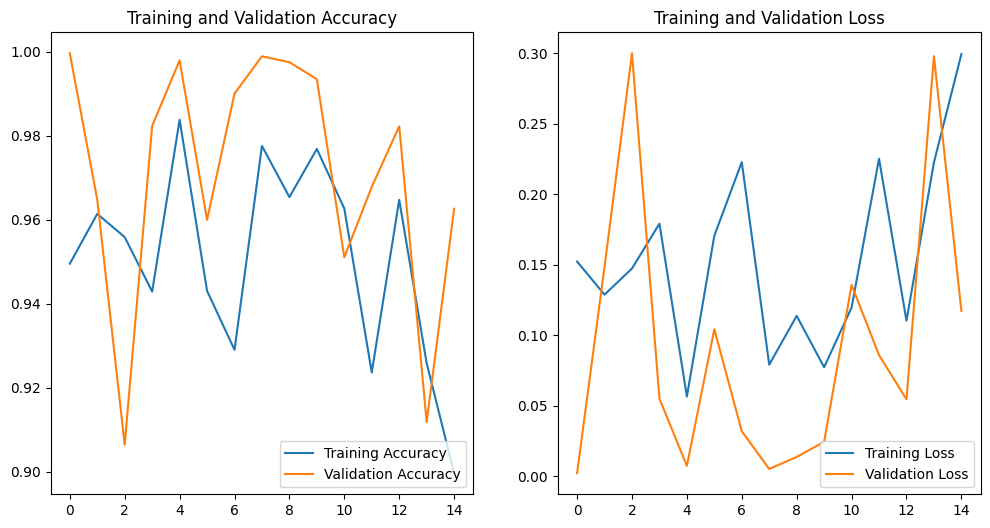

In [19]:
# Evaluate the model
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
 
#EPOCHS=15
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS_SIZE),acc, label="Training Accuracy")
plt.plot(range(EPOCHS_SIZE),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS_SIZE),loss, label="Training Loss")
plt.plot(range(EPOCHS_SIZE),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

# Definição da arquitetura da rede neural
model = Sequential()

# Primeira camada RNN
model.add(SimpleRNN(100, input_shape=(WINDOW_LENGTH, X_train.shape[2]), return_sequences=True))

# Segunda camada RNN
model.add(SimpleRNN(100))

# Dropout para regularização
model.add(Dropout(0.5))

# Camada de saída
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilação do modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Sumário do modelo
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 100)        │        11,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,903 (124.62 KB)

 Trainable params: 31,903 (124.62 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, y_train, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 252s 12ms/step - accuracy: 0.9239 - loss: 0.2394 - val_accuracy: 0.9644 - val_loss: 0.1213
Epoch 2/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 256s 12ms/step - accuracy: 0.9744 - loss: 0.0862 - val_accuracy: 0.9981 - val_loss: 0.0087
Epoch 3/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 284s 14ms/step - accuracy: 0.9939 - loss: 0.0265 - val_accuracy: 0.9967 - val_loss: 0.0113
Epoch 4/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 270s 13ms/step - accuracy: 0.9921 - loss: 0.0309 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 5/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 256s 12ms/step - accuracy: 0.9978 - loss: 0.0098 - val_accuracy: 0.8483 - val_loss: 0.6680
Epoch 6/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 253s 12ms/step - accuracy: 0.9355 - loss: 0.2151 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 7/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 355s 17ms/step - accuracy: 0.9731 - loss: 0.0945 - val_accuracy: 0.9940 - val_loss: 0.0268
Epoch 8/10
21008/21008 ━━━━━━━━━━━━━━━━━━━━ 324s 15ms/s

5252/5252 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.9535 - loss: 0.1275
Test loss: 0.12930159270763397, Test accuracy: 0.9525827169418335


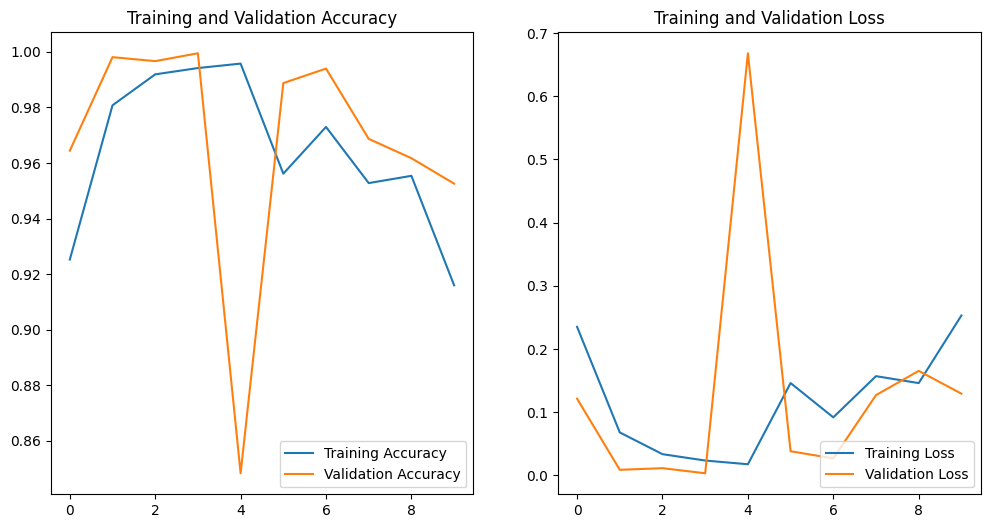

In [24]:
# Evaluate the model
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
 
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
 
 
#EPOCHS=15
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS_SIZE),acc, label="Training Accuracy")
plt.plot(range(EPOCHS_SIZE),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
 
#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS_SIZE),loss, label="Training Loss")
plt.plot(range(EPOCHS_SIZE),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [26]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, Flatten, SimpleRNN, Bidirectional
from keras.datasets import imdb
import numpy as np

In [27]:
rnn_model = Sequential()
rnn_model.add(Embedding(vocab_size, embedding_dims, input_length = maxlen))
rnn_model.add(SimpleRNN(units = 64, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(1, activation='sigmoid'))

NameError: name 'vocab_size' is not defined